In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from datasets import load_dataset

c:\Users\gayan\anaconda3\envs\python_1\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset_dict = load_dataset('lukebarousse/data_jobs')
df = dataset_dict['train'].to_pandas()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   job_title_short        785741 non-null  object 
 1   job_title              785740 non-null  object 
 2   job_location           784696 non-null  object 
 3   job_via                785733 non-null  object 
 4   job_schedule_type      773074 non-null  object 
 5   job_work_from_home     785741 non-null  bool   
 6   search_location        785741 non-null  object 
 7   job_posted_date        785741 non-null  object 
 8   job_no_degree_mention  785741 non-null  bool   
 9   job_health_insurance   785741 non-null  bool   
 10  job_country            785692 non-null  object 
 11  salary_rate            33067 non-null   object 
 12  salary_year_avg        22003 non-null   float64
 13  salary_hour_avg        10662 non-null   float64
 14  company_name           785723 non-nu

In [4]:
df.head(3)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."


In [5]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

In [6]:
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [7]:
type(df['job_posted_date'])

pandas.core.series.Series

In [8]:
df_anz = df[df['job_country'].isin (['Australia', 'New Zealand'])]

In [9]:
df_anz.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
90,Data Scientist,Data Scientist,Australia,via BeBee Australia,Full-time,False,Australia,2023-11-25 13:12:03,False,False,Australia,None,NaN,NaN,Concurrent Technologies Corporation,"['python', 'sql', 'r', 'java', 'bash', 'react'...","{'analyst_tools': ['tableau'], 'libraries': ['..."
267,Software Engineer,Senior Developer,"Wellington, New Zealand",via Jobs Trabajo.org,Full-time,False,New Zealand,2023-10-27 13:52:02,True,False,New Zealand,None,NaN,NaN,New Zealand Government,"['python', 'ruby', 'ruby', 'sql', 'postgresql'...","{'cloud': ['redshift'], 'databases': ['postgre..."
311,Data Scientist,Geospatial Intelligence Analyst,"Wellington, New Zealand",via Jobs Trabajo.org,Full-time,False,New Zealand,2023-10-27 13:51:37,True,False,New Zealand,None,NaN,NaN,Fire and Emergency New Zealand,"['python', 'sql', 'sql server']","{'databases': ['sql server'], 'programming': [..."
501,Software Engineer,Senior Engineer - Platform Engineering,"Sydney NSW, Australia",via LinkedIn,Full-time,False,Australia,2023-04-01 13:10:30,False,False,Australia,None,NaN,NaN,Slalom Build,"['aws', 'chef', 'puppet', 'ansible', 'terraform']","{'cloud': ['aws'], 'other': ['chef', 'puppet',..."
758,Senior Data Engineer,Senior Data Engineer,"Sydney NSW, Australia",via Trabajo.org,Full-time,False,Australia,2023-03-18 13:15:07,True,False,Australia,None,NaN,NaN,Mirvac,"['aws', 'snowflake', 'azure']","{'cloud': ['aws', 'snowflake', 'azure']}"


In [10]:
df_anz.reset_index(inplace=True)
df_anz.head(3)

,index,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,90,Data Scientist,Data Scientist,Australia,via BeBee Australia,Full-time,False,Australia,2023-11-25 13:12:03,False,False,Australia,None,NaN,NaN,Concurrent Technologies Corporation,"['python', 'sql', 'r', 'java', 'bash', 'react'...","{'analyst_tools': ['tableau'], 'libraries': ['..."
1,267,Software Engineer,Senior Developer,"Wellington, New Zealand",via Jobs Trabajo.org,Full-time,False,New Zealand,2023-10-27 13:52:02,True,False,New Zealand,None,NaN,NaN,New Zealand Government,"['python', 'ruby', 'ruby', 'sql', 'postgresql'...","{'cloud': ['redshift'], 'databases': ['postgre..."
2,311,Data Scientist,Geospatial Intelligence Analyst,"Wellington, New Zealand",via Jobs Trabajo.org,Full-time,False,New Zealand,2023-10-27 13:51:37,True,False,New Zealand,None,NaN,NaN,Fire and Emergency New Zealand,"['python', 'sql', 'sql server']","{'databases': ['sql server'], 'programming': [..."


In [11]:
import ast

# Define a function to safely convert to list, checking for both NA values and data type
def safe_eval(value):
    if pd.isna(value):  # Skip if the value is NA
        return value
    if isinstance(value, str):  # Only attempt conversion if the value is a string
        try:
            return ast.literal_eval(value)
        except (ValueError, SyntaxError, TypeError):
            return value  # Return the original value if conversion fails
    return value  # Return the value as is if it's not a string

# Apply the function to the job_skills column
df_anz['job_skills'] = df_anz['job_skills'].apply(safe_eval)

C:\Users\gayan\AppData\Local\Temp\ipykernel_10048\2706828275.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_anz['job_skills'] = df_anz['job_skills'].apply(safe_eval)


In [12]:
df_anz['job_skills'] = df_anz['job_skills'].apply(lambda x: x if isinstance(x, list) else [])

C:\Users\gayan\AppData\Local\Temp\ipykernel_10048\770214786.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_anz['job_skills'] = df_anz['job_skills'].apply(lambda x: x if isinstance(x, list) else [])


In [13]:
#import ast
#df_anz['job_skills'] = df_anz['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [14]:
type(df_anz['job_skills'][0])

list

In [15]:
anz_skills = df_anz.explode('job_skills', ignore_index=True)


In [16]:
top_skills = anz_skills ['job_skills'].value_counts().head(10)

In [17]:
top_skills_count = top_skills.to_frame()

Text(0.5, 1.0, 'Most Saught Afer Skills - All Data Related Jobs')

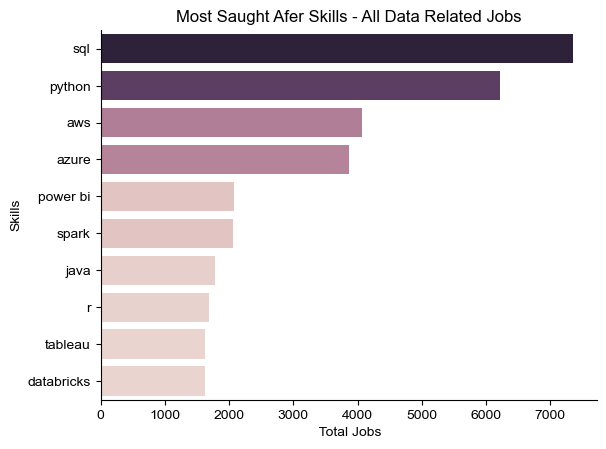

In [18]:
sns.barplot(data = top_skills_count, x = 'count', y = 'job_skills', hue = 'count', legend = False)
sns.set_theme(style= 'ticks')
sns.despine()
plt.xlabel(' Total Jobs')
plt.ylabel('Skills')
plt.title("Most Saught Afer Skills - All Data Related Jobs")

In [19]:
anz_skills.head()

,index,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,90,Data Scientist,Data Scientist,Australia,via BeBee Australia,Full-time,False,Australia,2023-11-25 13:12:03,False,False,Australia,None,NaN,NaN,Concurrent Technologies Corporation,python,"{'analyst_tools': ['tableau'], 'libraries': ['..."
1,90,Data Scientist,Data Scientist,Australia,via BeBee Australia,Full-time,False,Australia,2023-11-25 13:12:03,False,False,Australia,None,NaN,NaN,Concurrent Technologies Corporation,sql,"{'analyst_tools': ['tableau'], 'libraries': ['..."
2,90,Data Scientist,Data Scientist,Australia,via BeBee Australia,Full-time,False,Australia,2023-11-25 13:12:03,False,False,Australia,None,NaN,NaN,Concurrent Technologies Corporation,r,"{'analyst_tools': ['tableau'], 'libraries': ['..."
3,90,Data Scientist,Data Scientist,Australia,via BeBee Australia,Full-time,False,Australia,2023-11-25 13:12:03,False,False,Australia,None,NaN,NaN,Concurrent Technologies Corporation,java,"{'analyst_tools': ['tableau'], 'libraries': ['..."
4,90,Data Scientist,Data Scientist,Australia,via BeBee Australia,Full-time,False,Australia,2023-11-25 13:12:03,False,False,Australia,None,NaN,NaN,Concurrent Technologies Corporation,bash,"{'analyst_tools': ['tableau'], 'libraries': ['..."


In [20]:
skill_breakdown = anz_skills.groupby(['job_skills', 'job_title_short']).size()

df_skill_breakdown = skill_breakdown.reset_index(name = 'skill count')

df_skill_breakdown = df_skill_breakdown.sort_values(by= 'skill count', ascending = False)

df_skill_breakdown

,job_skills,job_title_short,skill count
1115,sql,Data Engineer,3143
875,python,Data Engineer,2546
87,azure,Data Engineer,1946
77,aws,Data Engineer,1900
1075,spark,Data Engineer,1224
...,...,...,...
1175,symphony,Business Analyst,1
1176,symphony,Data Analyst,1
1177,symphony,Data Engineer,1
446,heroku,Business Analyst,1


In [21]:
job_title  = 'Data Analyst'
no_of_skills = 10

df_skill_specific = df_skill_breakdown [df_skill_breakdown ['job_title_short'] == job_title].head(no_of_skills)

df_skill_specific

,job_skills,job_title_short,skill count
1114,sql,Data Analyst,981
874,python,Data Analyst,541
293,excel,Data Analyst,532
822,power bi,Data Analyst,531
1190,tableau,Data Analyst,378
906,r,Data Analyst,378
979,sas,Data Analyst,270
86,azure,Data Analyst,177
405,go,Data Analyst,166
76,aws,Data Analyst,130


Text(0.5, 1.0, 'Most Sought After Skills - Data Analyst Roles')

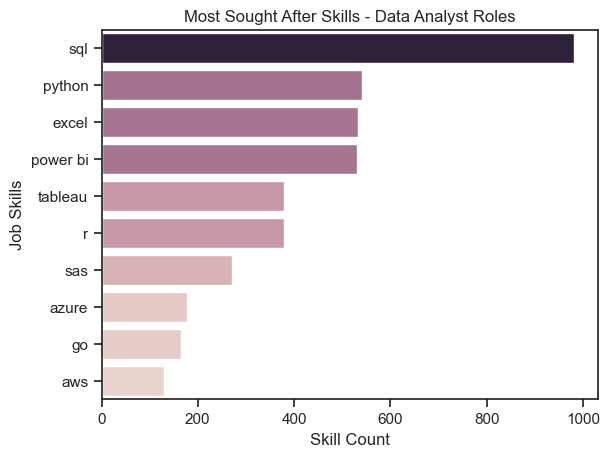

In [22]:
sns.barplot(data = df_skill_specific, x = 'skill count', y = 'job_skills', hue = 'skill count', legend = False)
plt.xlabel('Skill Count')
plt.ylabel ('Job Skills')
plt.title ('Most Sought After Skills - Data Analyst Roles')

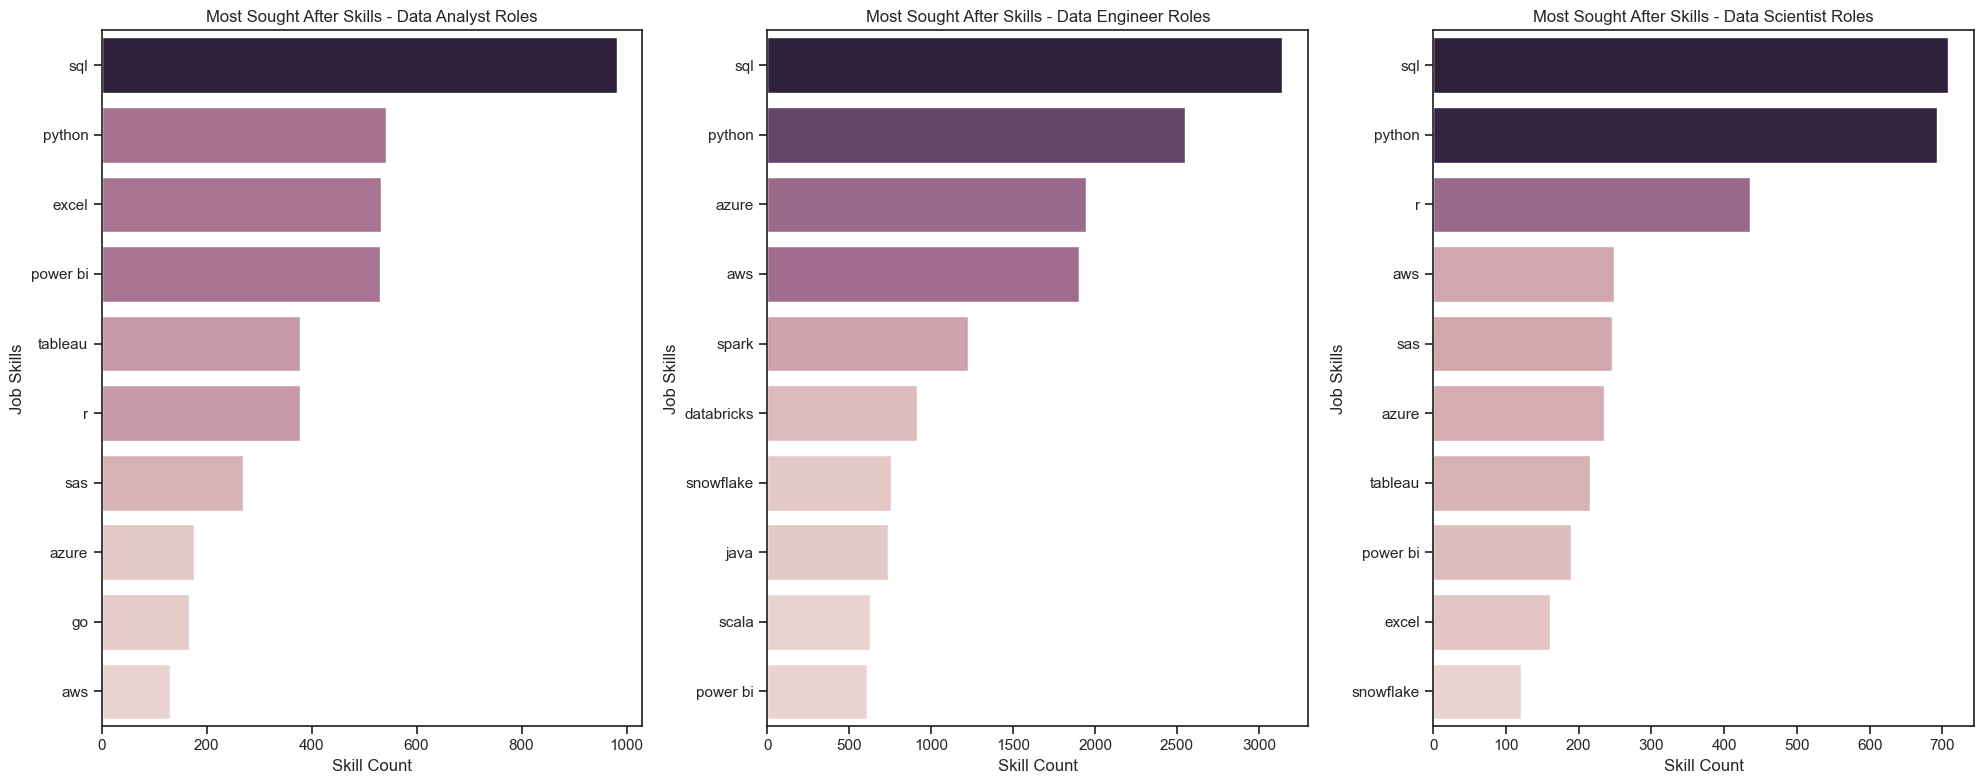

In [ ]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
no_of_skills = 10

fig, axes = plt.subplots(1, 3, figsize=(20, 8))

for i, job_title in enumerate(job_titles):
    df_skill_specific = df_skill_breakdown[df_skill_breakdown['job_title_short'] == job_title].head(no_of_skills)
    
    sns.barplot(data=df_skill_specific, x='skill count', y='job_skills', hue='skill count', ax=axes[i], dodge=False, legend=False)
    
    axes[i].set_xlabel('Skill Count')
    axes[i].set_ylabel('Job Skills')
    axes[i].set_title(f'Most Sought After Skills - {job_title} Roles')

plt.tight_layout()
plt.show()

In [35]:
df_anz = df_anz.copy()

In [36]:
df_anz['job_posted_month_no'] = df_anz['job_posted_date'].dt.month

In [37]:
# Using the 'explode' function to split the list of items in the job_co
data_explode = df_anz.explode('job_skills')
data_explode.head(3)

,index,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month_no
0,90,Data Scientist,Data Scientist,Australia,via BeBee Australia,Full-time,False,Australia,2023-11-25 13:12:03,False,False,Australia,None,NaN,NaN,Concurrent Technologies Corporation,python,"{'analyst_tools': ['tableau'], 'libraries': ['...",11
0,90,Data Scientist,Data Scientist,Australia,via BeBee Australia,Full-time,False,Australia,2023-11-25 13:12:03,False,False,Australia,None,NaN,NaN,Concurrent Technologies Corporation,sql,"{'analyst_tools': ['tableau'], 'libraries': ['...",11
0,90,Data Scientist,Data Scientist,Australia,via BeBee Australia,Full-time,False,Australia,2023-11-25 13:12:03,False,False,Australia,None,NaN,NaN,Concurrent Technologies Corporation,r,"{'analyst_tools': ['tableau'], 'libraries': ['...",11


In [42]:
skills_pivot = data_explode.pivot_table(index = 'job_posted_month_no', columns = 'job_skills', aggfunc= 'size', fill_value= 0)
skills_pivot.head()

job_skills,airflow,alteryx,angular,angular.js,ansible,apl,arch,asana,asp.net,asp.net core,...,webex,windows,wire,word,workfront,wrike,wsl,xamarin,yarn,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,155,39,3,0,37,0,0,3,0,0,...,0,41,1,63,0,0,0,1,4,4
2,83,22,3,1,22,0,0,2,0,0,...,0,28,1,22,0,0,1,0,3,3
3,77,10,13,0,45,0,0,2,4,2,...,0,44,1,24,0,0,0,0,4,4
4,60,22,13,0,27,0,0,2,3,1,...,1,42,0,32,0,0,0,0,4,2
5,61,13,11,0,15,0,0,1,4,2,...,1,18,0,14,0,0,0,0,1,1


In [45]:
skills_pivot.loc['Total'] = skills_pivot.sum()
skills_pivot = skills_pivot[skills_pivot.loc['Total'].sort_values(ascending= False).index]
skills_pivot

job_skills,sql,python,aws,azure,power bi,spark,java,r,tableau,databricks,...,wrike,workfront,clickup,mlpack,monday.com,ovh,ionic,nuxt.js,fedora,kali
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,1099,894,614,558,257,371,223,254,238,251,...,0,0,0,0,0,0,0,0,0,0
2,462,422,303,263,116,159,115,108,112,110,...,0,0,0,0,1,0,0,0,0,0
3,535,448,372,339,130,161,187,108,118,126,...,0,0,0,0,0,1,0,0,0,0
4,477,477,350,304,118,153,164,106,77,122,...,0,0,0,0,0,0,0,1,0,0
5,410,341,261,214,105,130,118,94,69,97,...,0,0,0,0,0,0,0,0,0,0
6,445,378,225,229,124,157,121,94,101,119,...,0,0,0,0,0,0,0,0,0,0
7,604,520,321,298,182,130,130,109,141,129,...,0,0,0,0,0,0,0,0,0,0
8,698,608,371,370,193,201,181,128,171,167,...,0,1,0,0,0,0,0,0,0,0
9,646,563,299,311,221,181,180,189,140,143,...,0,0,0,0,0,0,1,0,0,0


In [46]:
skills_pivot = skills_pivot.drop ('Total')
skills_pivot

job_skills,sql,python,aws,azure,power bi,spark,java,r,tableau,databricks,...,wrike,workfront,clickup,mlpack,monday.com,ovh,ionic,nuxt.js,fedora,kali
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,1099,894,614,558,257,371,223,254,238,251,...,0,0,0,0,0,0,0,0,0,0
2,462,422,303,263,116,159,115,108,112,110,...,0,0,0,0,1,0,0,0,0,0
3,535,448,372,339,130,161,187,108,118,126,...,0,0,0,0,0,1,0,0,0,0
4,477,477,350,304,118,153,164,106,77,122,...,0,0,0,0,0,0,0,1,0,0
5,410,341,261,214,105,130,118,94,69,97,...,0,0,0,0,0,0,0,0,0,0
6,445,378,225,229,124,157,121,94,101,119,...,0,0,0,0,0,0,0,0,0,0
7,604,520,321,298,182,130,130,109,141,129,...,0,0,0,0,0,0,0,0,0,0
8,698,608,371,370,193,201,181,128,171,167,...,0,1,0,0,0,0,0,0,0,0
9,646,563,299,311,221,181,180,189,140,143,...,0,0,0,0,0,0,1,0,0,0


In [66]:
# Filter down to the top 10 skills and create a line chart to show how they trended over the year
skills_pivot_top_5 = skills_pivot.iloc[:,:5]
skills_pivot_top_5

job_skills,sql,python,aws,azure,power bi
job_posted_month_no,,,,,
1,1099,894,614,558,257
2,462,422,303,263,116
3,535,448,372,339,130
4,477,477,350,304,118
5,410,341,261,214,105
6,445,378,225,229,124
7,604,520,321,298,182
8,698,608,371,370,193
9,646,563,299,311,221


Text(27.25, 0.5, 'Job Count')

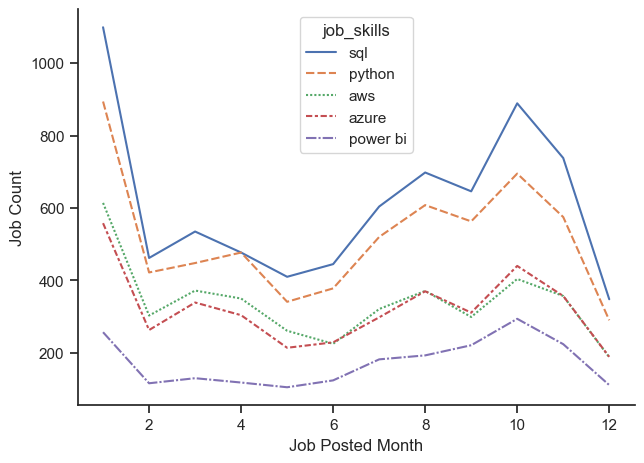

In [67]:
sns.lineplot(data= skills_pivot_top_5)
sns.despine()
plt.tight_layout()
plt.xlabel('Job Posted Month')
plt.ylabel('Job Count')


In [69]:
# Adjusting the dataframe to find the job skills trends in relation to the total number of jobs advertised throughout the year. 
df_anz_totals = df_anz.groupby('job_posted_month_no').size()

In [132]:
skills_pivot_perc = skills_pivot.div(df_anz_totals/100, axis = 0)

In [127]:
skills_pivot_perc.head()

job_skills,sql,python,aws,azure,power bi,spark,java,r,tableau,databricks,...,wrike,workfront,clickup,mlpack,monday.com,ovh,ionic,nuxt.js,fedora,kali
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,55.281690,44.969819,30.885312,28.068410,12.927565,18.661972,11.217304,12.776660,11.971831,12.625755,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
2,49.730893,45.425188,32.615716,28.310011,12.486545,17.115178,12.378902,11.625404,12.055974,11.840689,...,0.0,0.0,0.0,0.0,0.107643,0.000000,0.0,0.000000,0.0,0.0
3,46.806649,39.195101,32.545932,29.658793,11.373578,14.085739,16.360455,9.448819,10.323710,11.023622,...,0.0,0.0,0.0,0.0,0.000000,0.087489,0.0,0.000000,0.0,0.0
4,42.437722,42.437722,31.138790,27.046263,10.498221,13.612100,14.590747,9.430605,6.850534,10.854093,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.088968,0.0,0.0
5,50.306748,41.840491,32.024540,26.257669,12.883436,15.950920,14.478528,11.533742,8.466258,11.901840,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0


In [133]:
# Resetting the index if needed
skills_pivot_perc = skills_pivot_perc.reset_index()

# Converting month number to 3-letter month abbreviation
skills_pivot_perc['job_posted_month'] = skills_pivot_perc['job_posted_month_no'].apply(lambda x: pd.to_datetime(f"2022-{x:02d}-01").strftime('%b'))

# Setting 'job_posted_month' as the index
skills_pivot_perc = skills_pivot_perc.set_index('job_posted_month')

# Dropping the original month number column
skills_pivot_perc = skills_pivot_perc.drop(columns='job_posted_month_no')


In [134]:
# Limiting the new skills percentages dataframe to the top 5 skills
skills_pivot_perc_top = skills_pivot_perc.iloc[:,:5]
skills_pivot_perc_top

job_skills,sql,python,aws,azure,power bi
job_posted_month,,,,,
Jan,55.281690,44.969819,30.885312,28.068410,12.927565
Feb,49.730893,45.425188,32.615716,28.310011,12.486545
Mar,46.806649,39.195101,32.545932,29.658793,11.373578
Apr,42.437722,42.437722,31.138790,27.046263,10.498221
May,50.306748,41.840491,32.024540,26.257669,12.883436
Jun,51.208285,43.498274,25.891830,26.352129,14.269275
Jul,51.056636,43.956044,27.134404,25.190194,15.384615
Aug,45.921053,40.000000,24.407895,24.342105,12.697368
Sep,48.607976,42.362679,22.498119,23.401053,16.629044


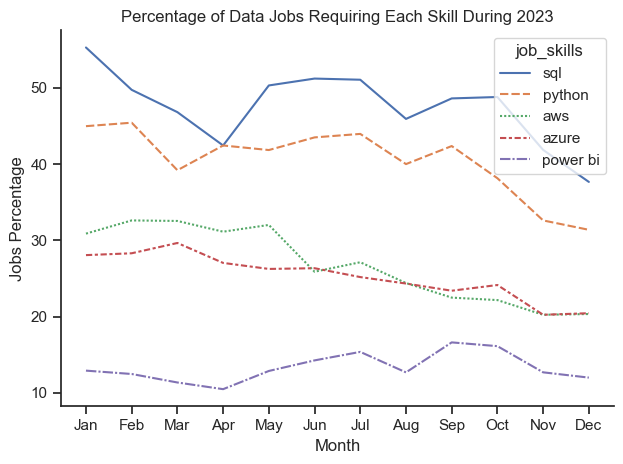

In [142]:
sns.lineplot(data = skills_pivot_perc_top)
plt.xlabel('Month')
plt.ylabel('Jobs Percentage')
plt.title('Percentage of Data Jobs Requiring Each Skill During 2023')
plt.tight_layout()
sns.despine()